In [3]:
# -*- coding: utf-8 -*-
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from collections import Counter

import datetime,time
import copy
##解决在jupyter中画图不显示的问题
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [4]:
#编码问题
import sys
defaultencoding = 'utf-8'
if sys.getdefaultencoding() != defaultencoding:
    reload(sys)
    sys.setdefaultencoding(defaultencoding)
    
import this

In [5]:
#读取数据
data  = pd.read_csv("F:/2Task/1-Shenwo EV/data/8.csv",low_memory = False)

In [6]:
timenote = pd.read_csv("F:/2Task/1-Shenwo EV/tempsave/idx8.csv", low_memory = False)

In [7]:
tripnote = pd.read_csv("F:/2Task/1-Shenwo EV/temp/Car14_D913Trip.csv", low_memory = False)

In [8]:
sid = timenote['start idx']
stm = timenote['start']   
eid = timenote['end idx']
etm = timenote['end']

In [9]:
#变量赋值
timestamp = data['TIMESTAMP']
date = data['DATIME_RX']

longitude = data['经度']
latitude = data['纬度']
v_origin = data['速度']
velocity = data['速度']

altitude = data['海拔']
incluAngle = data['夹角']
mile = data['里程']

height = data['高度']
bearing = data['方向角']
frameTime = data['起始帧时间']
canType = data['CAN数据格式']

paraTime = data['参数采集的时间']
paraNum = data['参数个数']
paraLen = data['参数长度']

bearing_1 = data['方向角.1']

brake = data['制动开关']
park = data['驻车制动开关']
accPedal = data['加速踏板']
accPedalLoc = data['油门踏板位置']
brakePedalLoc = data['制动踏板位置']

gearReq = data['档位请求']
opMode = data['运行模式']
gear = data['当前档位']

mainRlyCon = data['主继电器状态']
preRlyCon = data['预充继电器状态']

carDirec = data['车行方向']
motorSpeed = data['电机转速']
motorTorque = data['电机扭矩']

motor_1 = data['电机1状态']
motorDICO = data['电机DICO状态']
waterTem = data['水温']

lineV = data['主线电压']
lineC = data['主线电流']
motorTem = data['电机温度']
inWaTem = data['进水温度']
ouWaTem = data['出水温度']

SOC = data['SOC']
monoHiV = data['单体最高电压']
monoLoV = data['单体最低电压']
bms = data['BMS状态']
bmsInsu = data['BMS绝缘状态']

voltage = data['电池电压']
current = data['电池电流']
resistance = data['绝缘阻值']

totalCharge = data['总充电量']
totalDischarge = data['总放电量']
restCharge = data['剩余电量']
lastCharge = data['最后一次充电量']

bkdoor = data['后门信号']
frdoor = data['前门信号']
tmile = data['总里程']
emergc = data['急停开关状态']

drivingRange = data['续驶里程']
unitPowerConsume = data['单位电耗']

# 时间戳更靠谱
## 把时间戳转换为年月日时分秒毫秒

In [10]:
def timestamp2string(timeStamp):  
    try:  
        d = datetime.datetime.fromtimestamp(timeStamp/1000.0)  
        str1 = d.strftime("%Y-%m-%d %H:%M:%S.%f")  
        # 2015-08-28 16:43:37.283000'  
        return str1  
    except Exception as e:  
        print e  
        return ''  

# 把时间戳转换成时间，也放到每一天的数据字典里面

In [11]:
time = []
for ts in timestamp.values:
    time.append(timestamp2string(ts))
time = Series(time)

In [12]:
#自定义函数，把每一天的速度数据去掉因填充0而产生的极值

def velfil(vel):
    for i in range(len(vel)-2):
        if (abs(vel.values[i] - vel.values[i+1]) > 100) & (abs(vel.values[i+1] - vel.values[i+2]) > 100):
            vel.values[i+1] = (vel.values[i] + vel.values[i+2])/2
    return vel
        
            

In [122]:
# 自定义函数，每辆车的每一天是一个字典，里面的内容包括。。。。，时间适合9.1~9.21

#dic中的每一参数，都是Series格式，方便记录原始id

def asdic (date, sid, stm, eid, etm):
    n = 21 - date
    dic = {
           "tmst":timestamp[sid[n]:eid[n]],
           "tm":time[sid[n]:eid[n]],
           "vel":velfil(velocity[sid[n]:eid[n]]),
           "mt":motorSpeed[sid[n]:eid[n]],
           "up":unitPowerConsume[sid[n]:eid[n]],
           "lon":longitude[sid[n]:eid[n]],
           "lat":latitude[sid[n]:eid[n]],
           "soc":SOC[sid[n]:eid[n]]
          }
    #把每一天的数据转换成DF，并且倒序，按照正常的时间发展顺序排列
    dic = DataFrame(dic).sort_index(ascending = False)
    
    return dic

# veloctiy 中会有nan，首先去除nan

In [123]:
#先填零，然后找极值， 前后两个值的均值作为替换

velocity = velocity.fillna(0)

In [124]:
#这样生成的每一个字典中的每一项，都是一个Series，后续要转化成list方便引用

d921 = asdic(21, sid, stm, eid, etm)
d920 = asdic(20, sid, stm, eid, etm)
d919 = asdic(19, sid, stm, eid, etm)
d918 = asdic(18, sid, stm, eid, etm)
d917 = asdic(17, sid, stm, eid, etm)
d916 = asdic(16, sid, stm, eid, etm)
d915 = asdic(15, sid, stm, eid, etm)
d914 = asdic(14, sid, stm, eid, etm)
d913 = asdic(13, sid, stm, eid, etm)
d912 = asdic(12, sid, stm, eid, etm)
d911 = asdic(11, sid, stm, eid, etm)
d910 = asdic(10, sid, stm, eid, etm)
d909 = asdic(9, sid, stm, eid, etm)
d908 = asdic(8, sid, stm, eid, etm)
d907 = asdic(7, sid, stm, eid, etm)
d906 = asdic(6, sid, stm, eid, etm)
d905 = asdic(5, sid, stm, eid, etm)
d904 = asdic(4, sid, stm, eid, etm)
d903 = asdic(3, sid, stm, eid, etm)
d902 = asdic(2, sid, stm, eid, etm)
d901 = asdic(1, sid, stm, eid, etm)

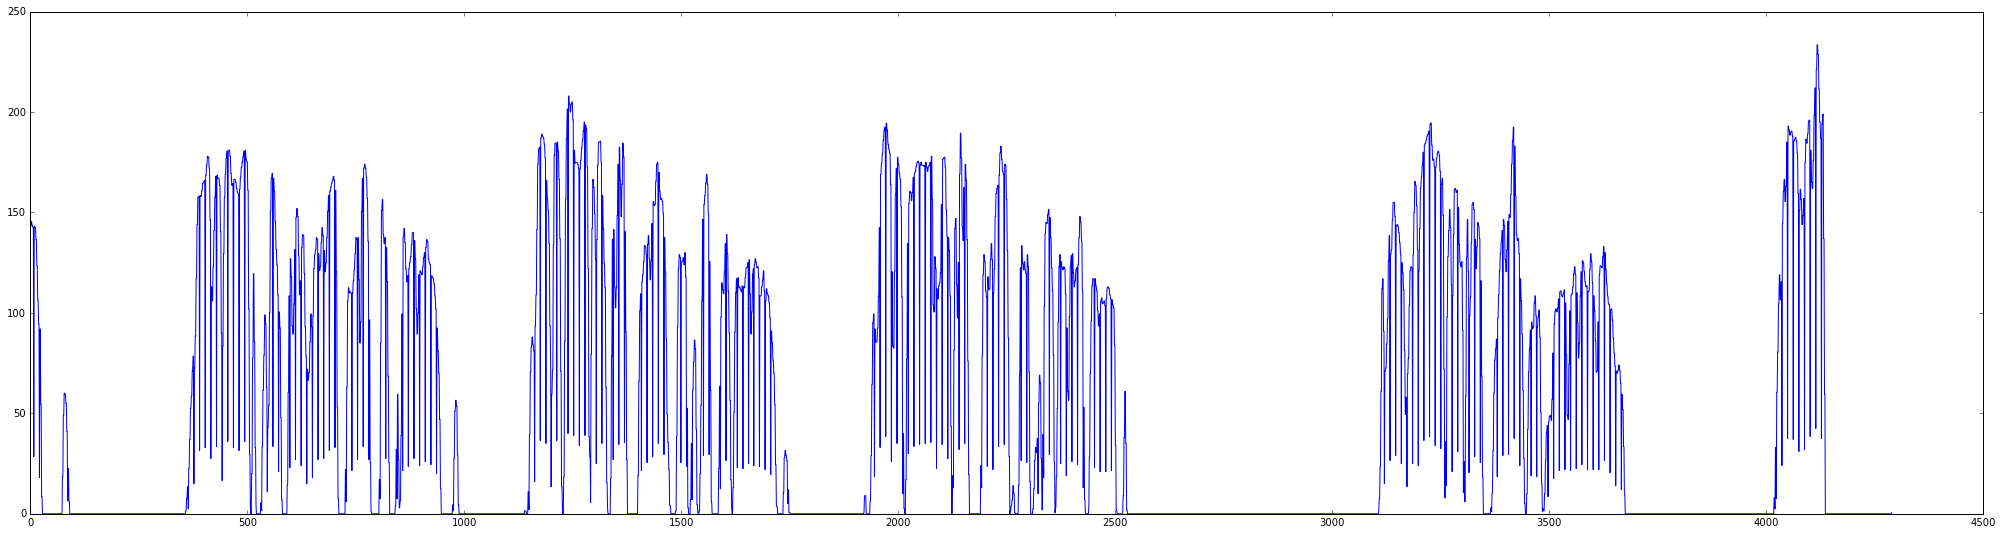

In [95]:
plt.figure(figsize = (35,9))

plt.plot(d921['vel'])

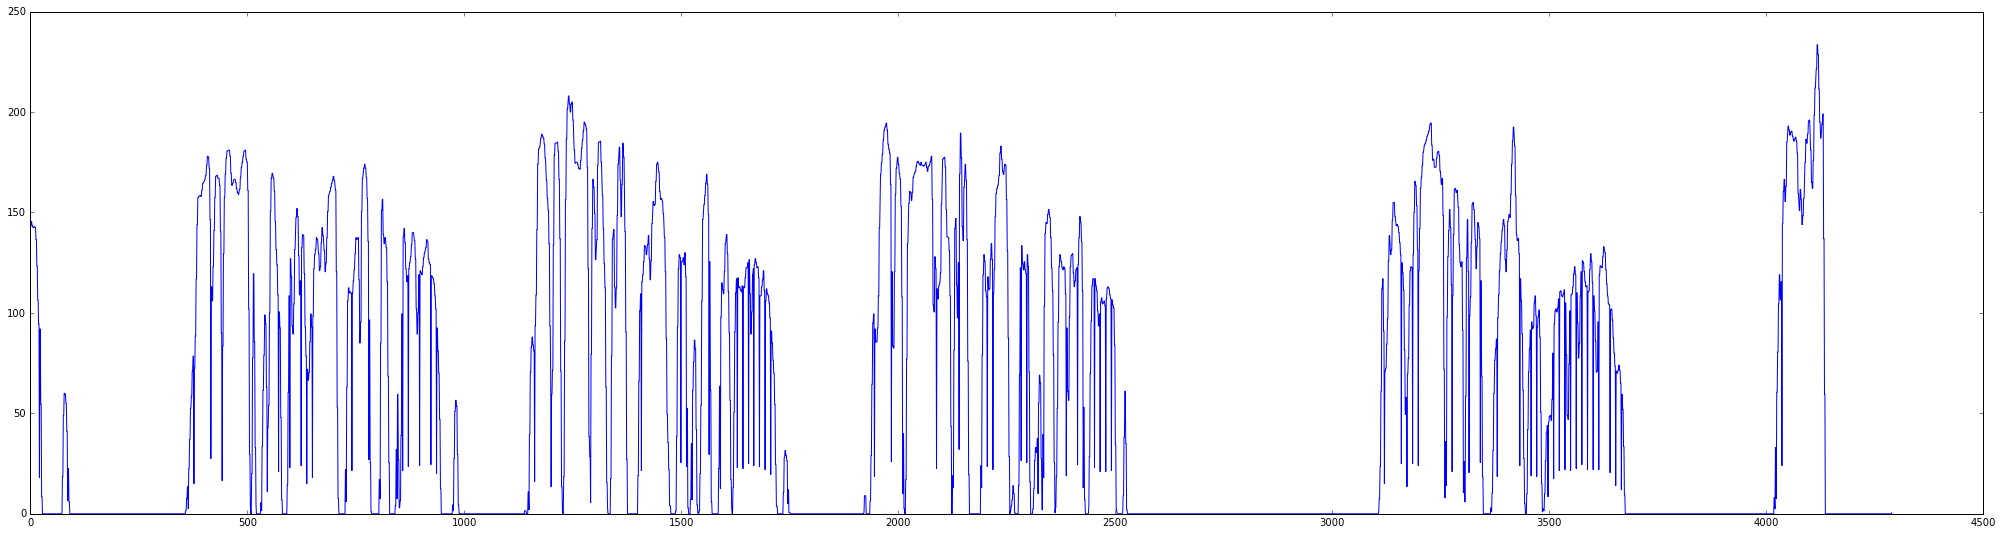

In [96]:
plt.figure(figsize = (35,9))
 
plt.plot(velfil(d921['vel']))

# 划分Trip
## 如果速度连续为400个0，则标记为停车
记录停车时长、所在时刻，停车前后分别行驶了多久
按照一辆车一天来划分

In [125]:
def parkCount(temp,to_add_dic):
    
    pk_st_id = []
    pk_ed_id = []
    pk_st_tm = []
    pk_ed_tm = []
    pk_intvl = []
  
    ls = list(temp['vel'].values) #临时保存速度信息，列表格式
    interval = 300
    
    #创建一个长度为400的全0list
    zero = []
    for j in range(interval):
        zero.append(0)
    
    i = 0
    while i < len(temp):
        if ls[i:i+interval] == zero:#如果连续300个是0，则判断为停车区间
            pk_st_id.append(temp['vel'].index[i])  #保存停车开始的id
            t1 = temp['tm'].values[i]   #保存停车开始的时间
            pk_st_tm.append(t1)
            
            if (i + interval) < len(temp):
                while (ls[i+interval] == 0) & ((i + interval) < len(temp) - 1):#一直向后数0，直到不再为零，则停车结束
                    i = i + 1
                
            pk_ed_id.append(temp['vel'].index[i+interval-1])
            t2 = temp['tm'].values[i+interval-1]
            pk_ed_tm.append(t2)
            
            #计算时间差值，忽略毫秒
            pk_intvl.append(
                (datetime.datetime.strptime(t2,'%Y-%m-%d %H:%M:%S.%f') - 
                 datetime.datetime.strptime(t1,'%Y-%m-%d %H:%M:%S.%f')).seconds
            )
            
            i = i + interval #从下一个不为零的点开始继续查找长0串
        if (i+interval) < len(temp):
            i = i + 1
        else:
            i = i + 10000000000000
    
    #字典赋值
    to_add_dic['pk_st_id'] = pk_st_id
    to_add_dic['pk_st_tm'] = pk_st_tm
    to_add_dic['pk_ed_id'] = pk_ed_id   
    to_add_dic['pk_ed_tm'] = pk_ed_tm
    to_add_dic['pk_intvl'] = pk_intvl
    i = 0
    return to_add_dic

In [126]:
# 建立每一天的停车记录信息
t921 = dict()
t920 = dict()
t919 = dict()
t918 = dict()
t917 = dict()
t916 = dict()
t915 = dict()
t914 = dict()
t913 = dict()
t912 = dict()
t911 = dict()
t910 = dict()
t909 = dict()
t908 = dict()
t907 = dict()
t906 = dict()
t905 = dict()
t904 = dict()
t903 = dict()
t902 = dict()
t901 = dict()
t831 = dict()
t830 = dict()
t829 = dict()
t828 = dict()

In [127]:
#先找一周的
t920 = parkCount(d920,t920)
t919 = parkCount(d919,t919)
t918 = parkCount(d918,t918)
t917 = parkCount(d917,t917)
t916 = parkCount(d916,t916)
t915 = parkCount(d915,t915)
t914 = parkCount(d914,t914)


In [111]:
# 实验部分
pk_st_id = []
pk_ed_id = []
pk_st_tm = []
pk_ed_tm = []
pk_intvl = []

temp =d918
ls = list(temp['vel'].values) #临时保存速度信息，列表格式
interval = 300
    
    #创建一个长度为400的全0list
zero = []
for j in range(interval):
    zero.append(0)
    
i = 0
while i < len(temp):
        
    if ls[i:i+interval] == zero:#如果连续300个是0，则判断为停车区间
        pk_st_id.append(temp['vel'].index[i])  #保存停车开始的id
        t1 = temp['tm'].values[i]   #保存停车开始的时间
        pk_st_tm.append(t1)
        if (i + interval) < len(temp):
            while (ls[i+interval] == 0) & ((i + interval) < len(temp) - 1):#一直向后数0，直到不再为零，则停车结束
                i = i + 1
        pk_ed_id.append(temp['vel'].index[i+interval-1])
        t2 = temp['tm'].values[i+interval-1]
        pk_ed_tm.append(t2)
            
        #计算时间差值，忽略毫秒
        
        pk_intvl.append(
            (datetime.datetime.strptime(t2,'%Y-%m-%d %H:%M:%S.%f') - 
             datetime.datetime.strptime(t1,'%Y-%m-%d %H:%M:%S.%f')).seconds
         )
        i = i + interval
        
    if (i+interval+1) < len(temp):
        i = i + 1
    else:
        i = i + 10000000000000



# 看一下，SOC、剩余电量等&单位电耗&速度的关系

In [128]:
def trip(tdic):
    trip_to_add = dict()
    trip_num = []
    trip_st_id = []
    trip_ed_id = []
    trip_st_tm = []
    trip_ed_tm = []
    trip_intvl = []

    i = 0
    while i < len(tdic['pk_ed_id']) - 1:
        trip_num.append(i)
        trip_st_id.append(tdic['pk_ed_id'][i])
        trip_st_tm.append(tdic['pk_ed_tm'][i])
        trip_ed_id.append(tdic['pk_st_id'][i + 1])
        trip_ed_tm.append(tdic['pk_st_tm'][i + 1])
        trip_intvl.append(
        (datetime.datetime.strptime(tdic['pk_st_tm'][i + 1],'%Y-%m-%d %H:%M:%S.%f') - 
         datetime.datetime.strptime(tdic['pk_ed_tm'][i],'%Y-%m-%d %H:%M:%S.%f')).seconds/60
        )
        i = i + 1
        
    trip_to_add['trip_num'] = trip_num
    trip_to_add['trip_st_id'] = trip_st_id
    trip_to_add['trip_ed_id'] = trip_ed_id
    trip_to_add['trip_st_tm'] = trip_st_tm
    trip_to_add['trip_ed_tm'] = trip_ed_tm
    trip_to_add['trip_intvl'] = trip_intvl
    return trip_to_add

In [129]:
# 得出9.14~9.20 七天的trip
trip920 = trip(t920)
trip919 = trip(t919)
trip918 = trip(t918)
trip917 = trip(t917)
trip916 = trip(t916)
trip915 = trip(t915)
trip914 = trip(t914)

# 画图

## 七天的速度， 每天的所有trip画到一张图

In [130]:
# 定义一个函数，画出每一天所有trip的速度图， 画到一起
def vel_plot(trip_day):
    num = len(trip_day['trip_num'])
    plt.figure(figsize = (60,8))
    for i in range(num):
        ls = list(velocity[trip_day['trip_ed_id'][i]:trip_day['trip_st_id'][i]])
        ls.reverse()
        plt.plot(ls, label = 'trip {i}'.format(i=i))
    plt.legend(loc = 'best')

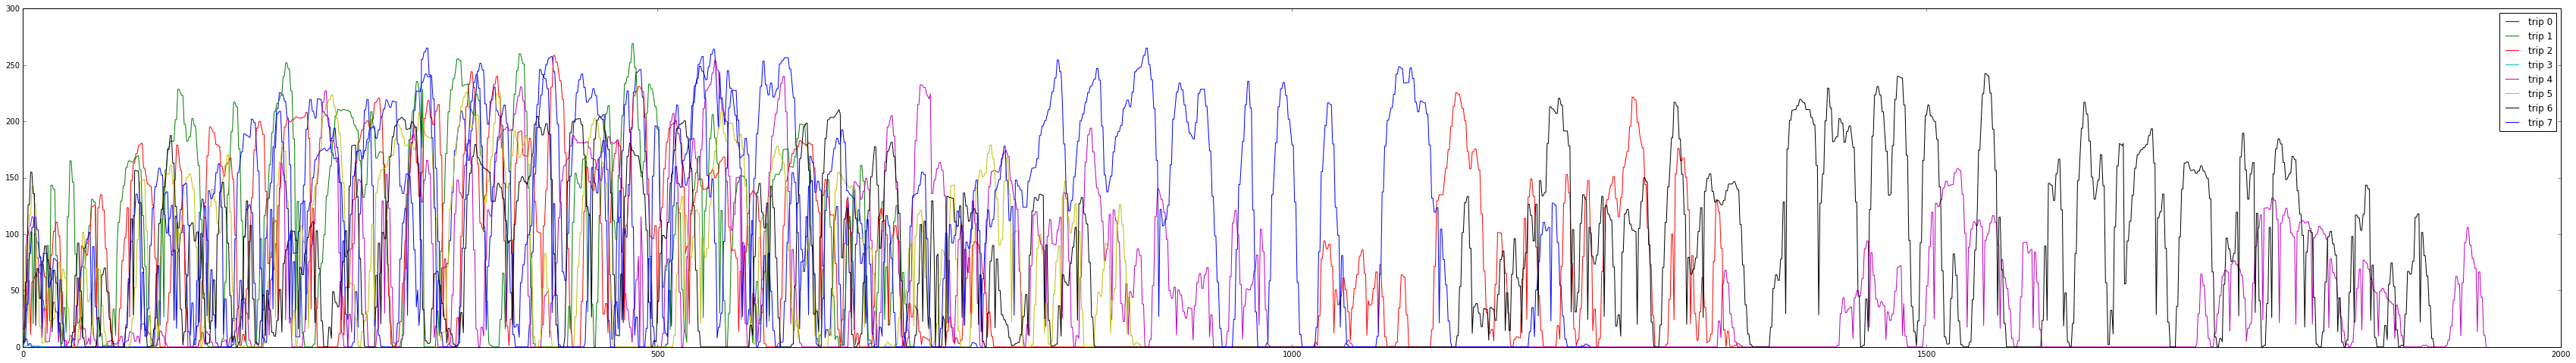

In [131]:
vel_plot(trip916)

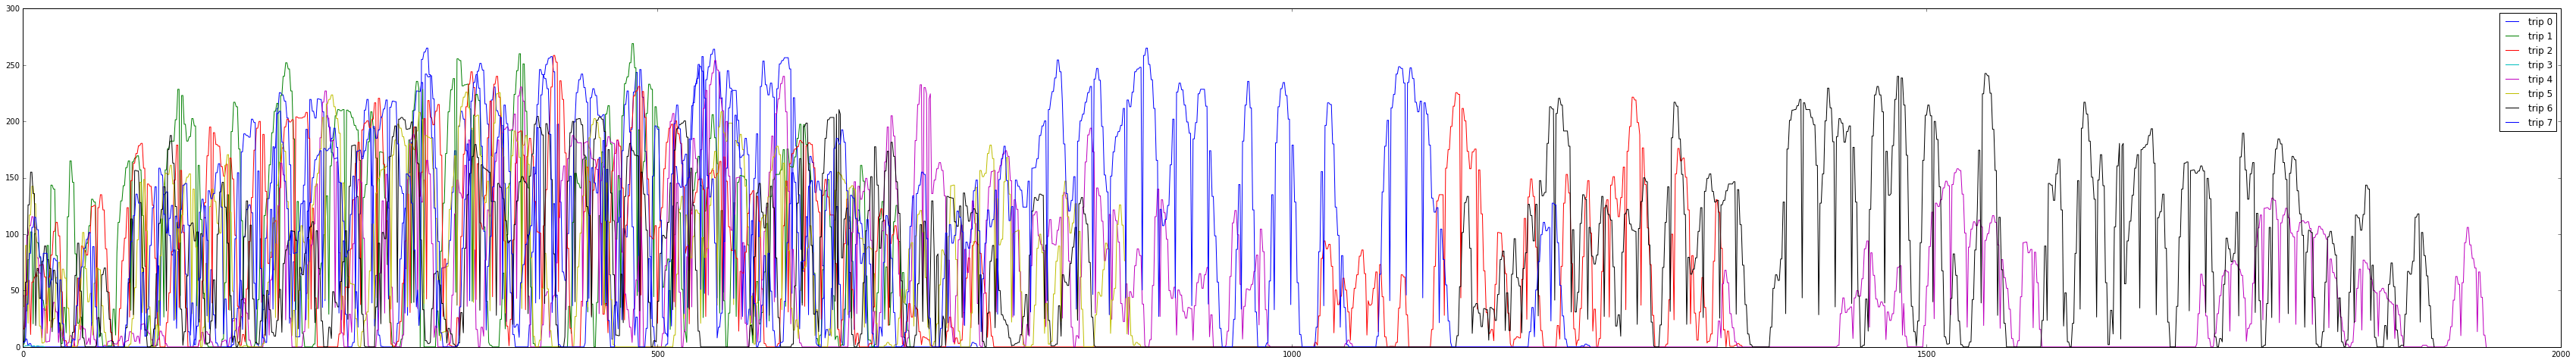

In [73]:
vel_plot(trip916)

In [132]:
# 定义一个函数，画出每一天所有trip的速度图, 分开画
def vel_sub_plot(trip_day):
    num = len(trip_day['trip_num'])
    plt.figure(figsize = (60,30))
    i = 1
    while i < num:
        plt.subplot(num,1,i)
        ls = list(velocity[trip_day['trip_ed_id'][i]:trip_day['trip_st_id'][i]])
        ls.reverse()
        plt.plot(ls, label = 'trip {i}'.format(i=i))
        i = i + 1
        plt.legend(loc = 'best')

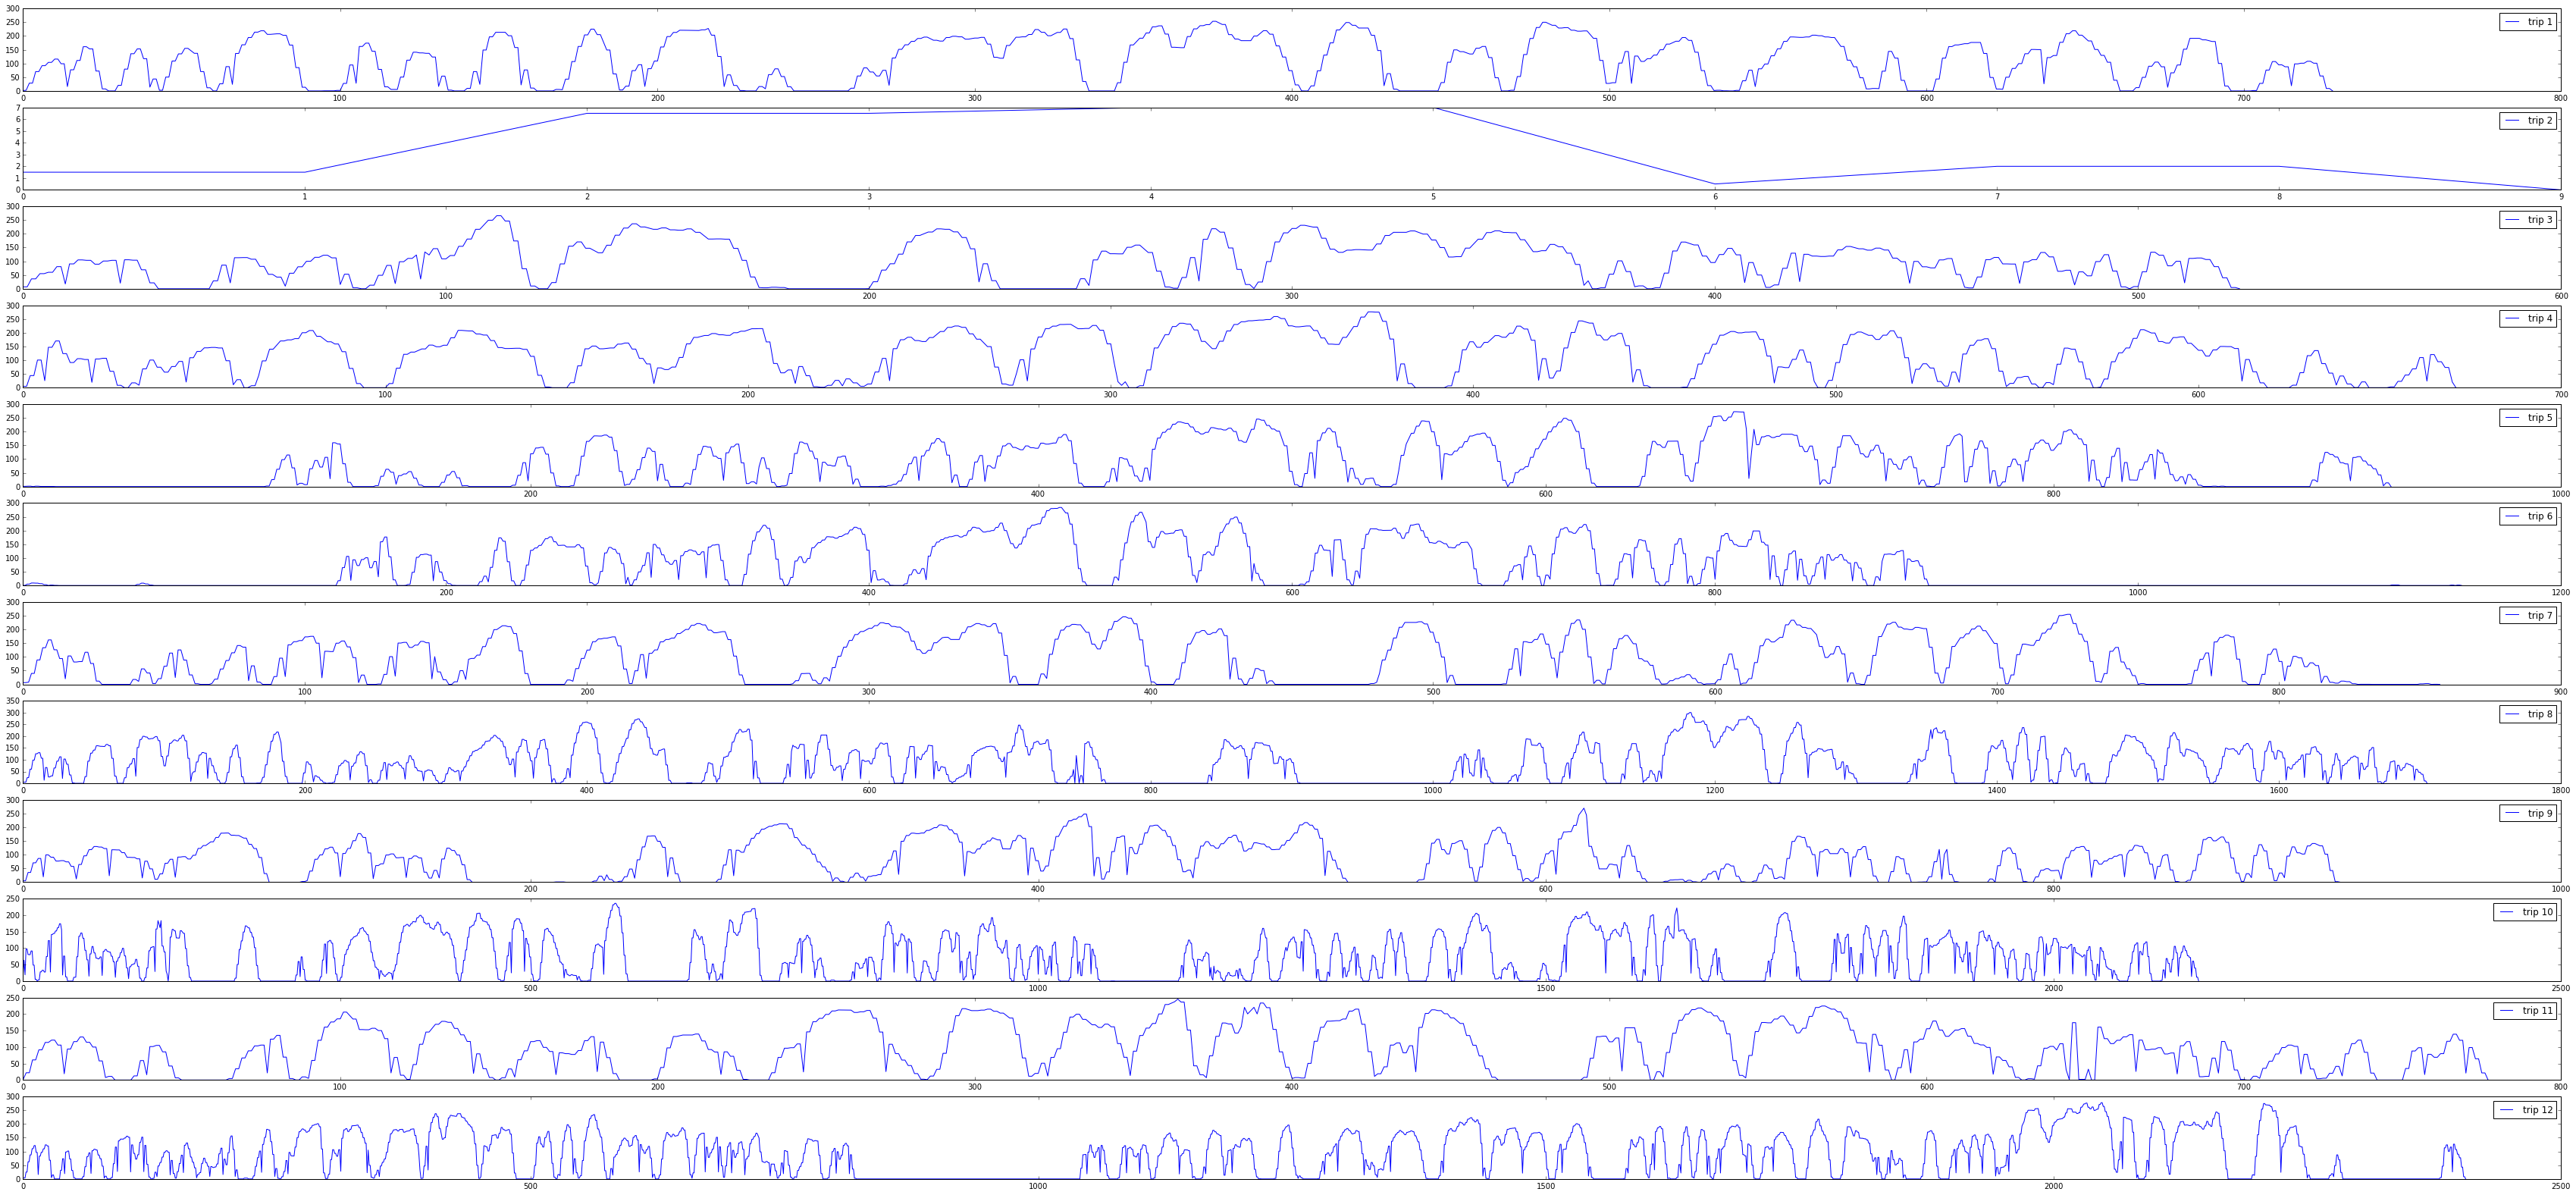

In [133]:
vel_sub_plot(trip914)

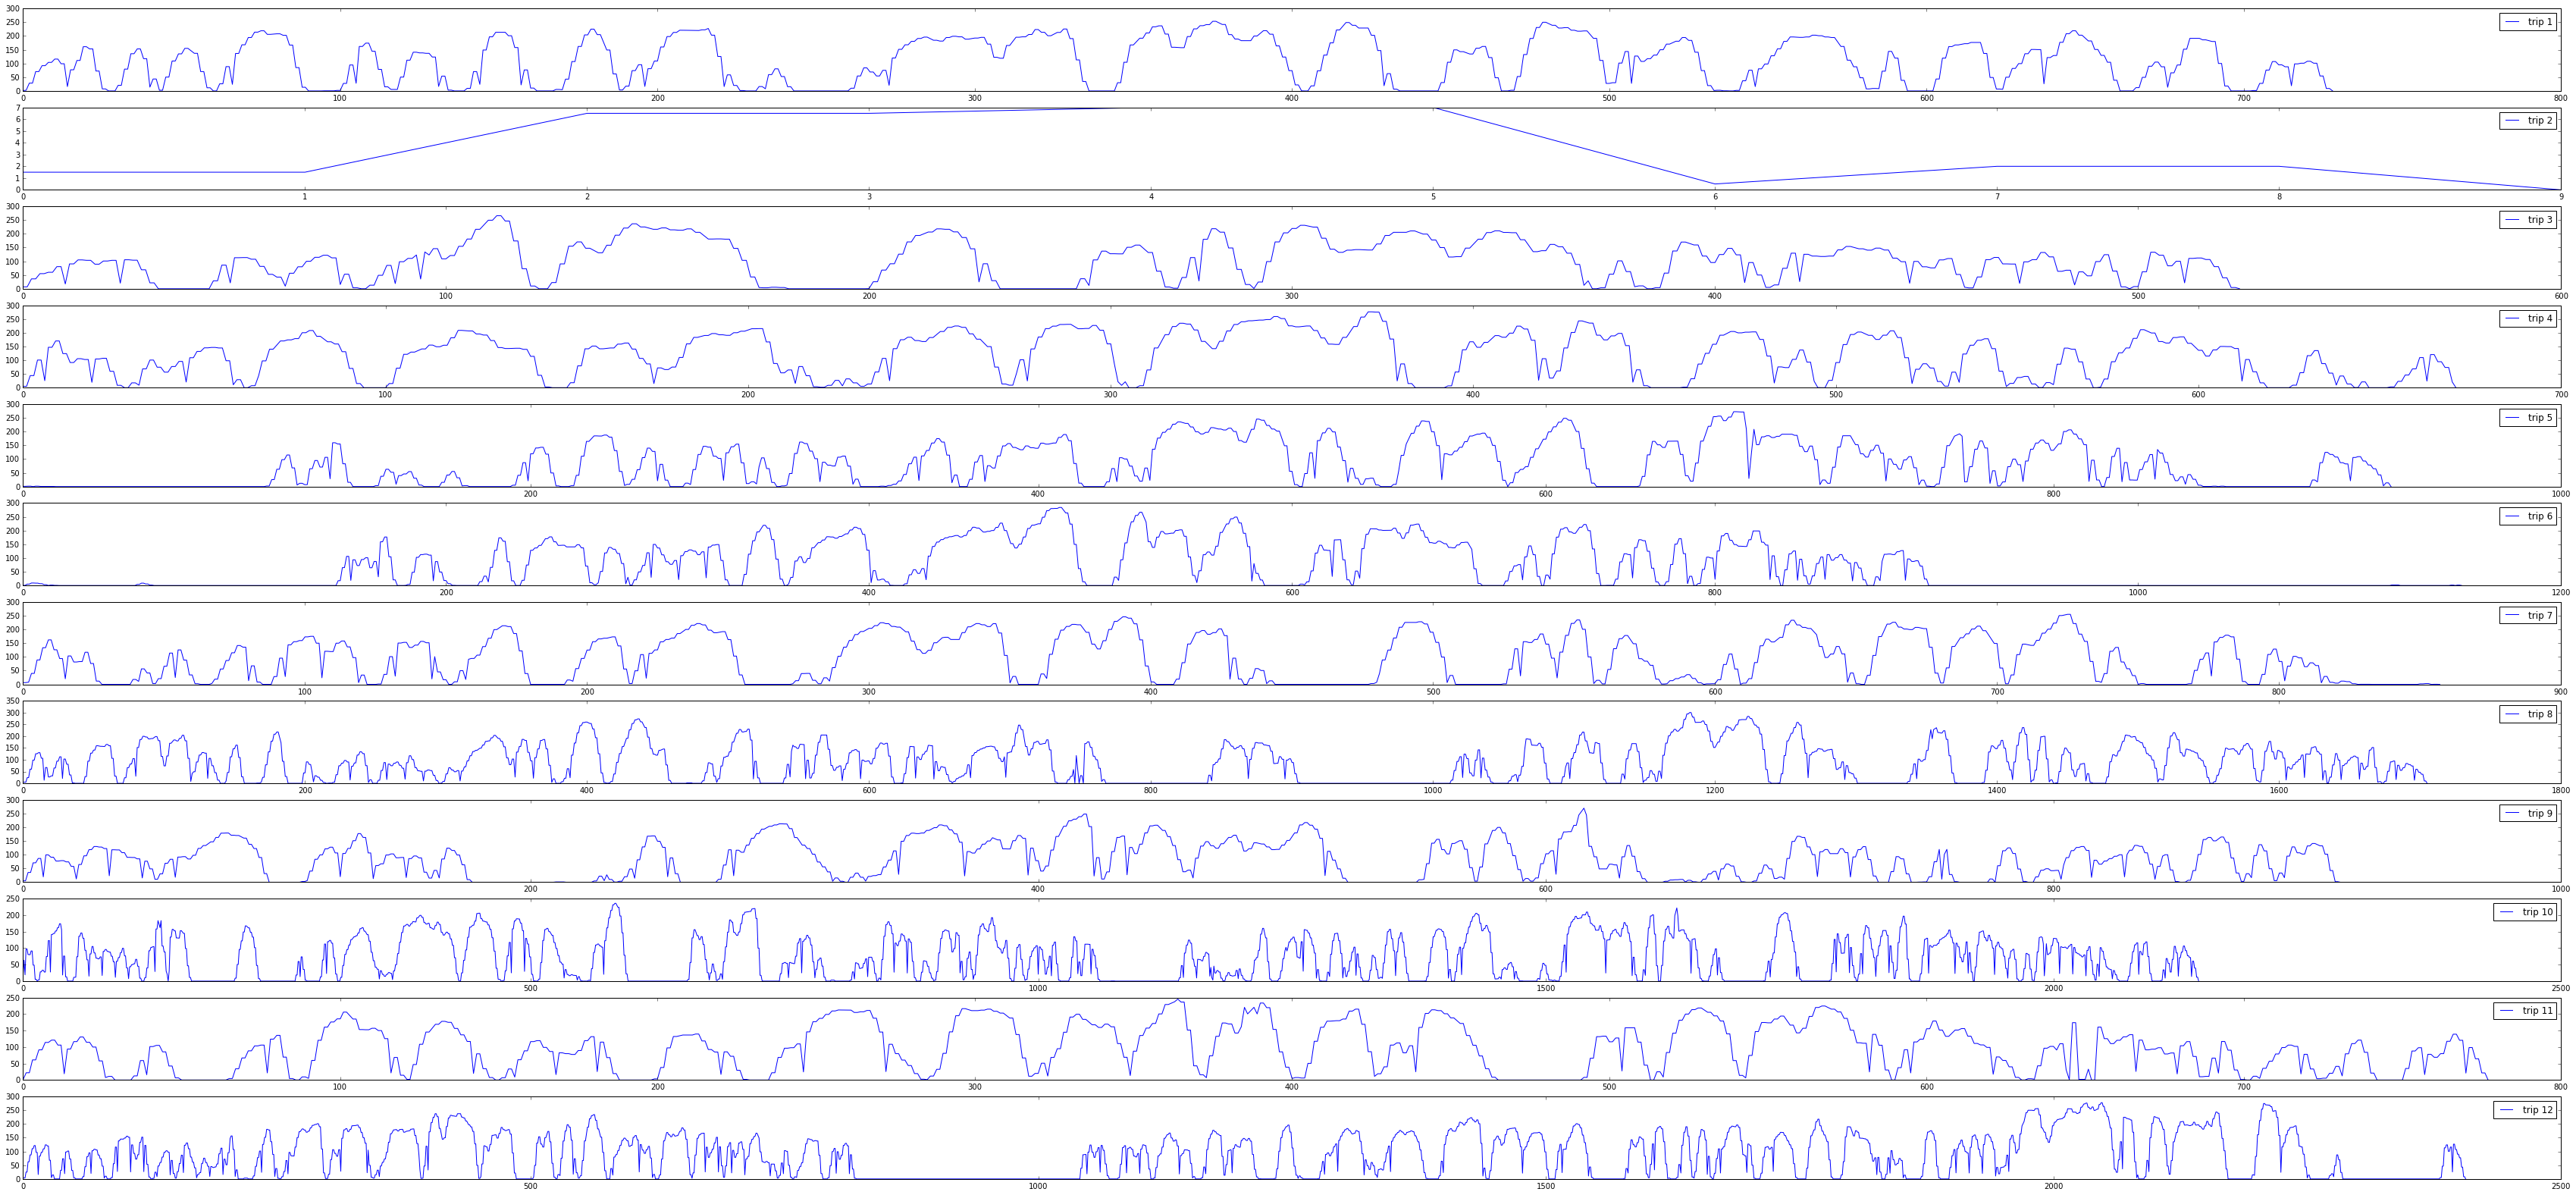

In [248]:
vel_sub_plot(trip914)

## 把SOC、剩余电量、速度等去nan、补零、去极值、归一化

In [134]:
# 归一化

def norm(d):
    new = []
    i = 0
    max_ = max(d)
    min_ = min(d)
    r = max_ - min_
    for i in range(len(d)):
        new.append(d[i])
        new[i] = (d[i] - min_)/r
    return new

In [135]:
#去极值的函数

def drop_extreme(series,interval):
    
    #先补零
    series = series.fillna(0)
    if series.values[0] == 0:
        series.values[0] = series.values[1] # 第一项总是缺失值，为了避免把真正的值滤除，令第一项 = 第二项的数值
    i = 0
    
    #去掉nan值后，会出现89,0,89,0,90,0,这样的值————去除
    while i < len(series) - 2:
        if ((series.values[i+1] - series.values[i]) < interval) & ((series.values[i+1] - series.values[i+2]) < interval):
            series.values[i+1] = (series.values[i] + series.values[i+2])/2
        i = i + 1
    
    #去掉0凹谷情况后，会有连续两个0出现的情况，89,89,...,0,0,91,91,...,0,0,...————去除
    j = 0
        
    while j < len(series) - 5:
        if (series.values[j + 1] == 0) & (series.values[j + 2] == 0) & (series.values[j] > 1) & (series.values[j + 3] > 1):
            series.values[j + 1] = series.values[j]
            series.values[j + 2] = series.values[j + 3]
        j = j + 1
    return series    

In [136]:
SOC_n = norm(drop_extreme(SOC, 0))
restCharge_n = norm(drop_extreme(restCharge, 0))
velocity_n = norm(drop_extreme(velocity, 0))
unitPowerConsume_n = norm(drop_extreme(unitPowerConsume, 0))

## 剩余电量、SOC、单位电耗 分别和速度画图（注意归一化）

In [137]:
# 9.20 的五个trip  为例子

restCharge0 = restCharge_n[trip920['trip_ed_id'][0]:trip920['trip_st_id'][0]]
restCharge0.reverse()
soc0 = SOC_n[trip920['trip_ed_id'][0]:trip920['trip_st_id'][0]]
soc0.reverse()
unitPowerConsume0 = unitPowerConsume_n[trip920['trip_ed_id'][0]:trip920['trip_st_id'][0]]
unitPowerConsume0.reverse()
velocity0 = velocity_n[trip920['trip_ed_id'][0]:trip920['trip_st_id'][0]]
velocity0.reverse()
restCharge1 = restCharge_n[trip920['trip_ed_id'][1]:trip920['trip_st_id'][1]]
restCharge1.reverse()
soc1 = SOC_n[trip920['trip_ed_id'][1]:trip920['trip_st_id'][1]]
soc1.reverse()
unitPowerConsume1 = unitPowerConsume_n[trip920['trip_ed_id'][1]:trip920['trip_st_id'][1]]
unitPowerConsume1.reverse()
velocity1 = velocity_n[trip920['trip_ed_id'][1]:trip920['trip_st_id'][1]]
velocity1.reverse()

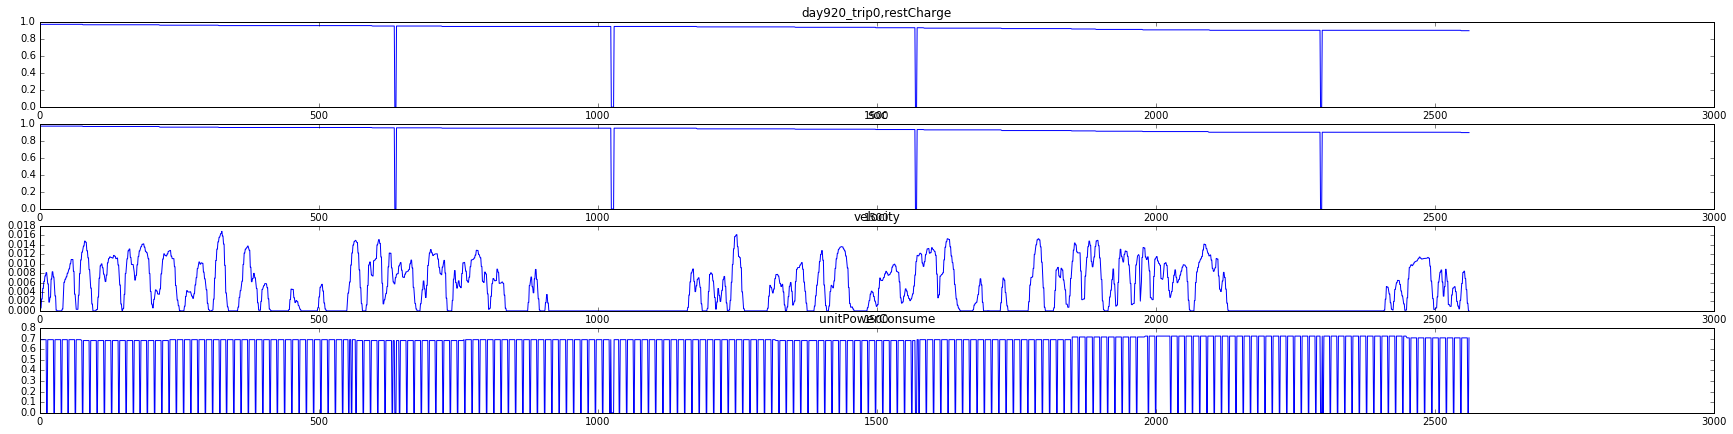

In [138]:
plt.figure(1,figsize = (30,7))
plt.subplot(411)
plt.plot(restCharge0)
plt.title('day920_trip0,restCharge')

plt.subplot(412)
plt.plot(soc0 )
plt.title('soc')

plt.subplot(413)
plt.plot(velocity0)
plt.title('velocity')

plt.subplot(414)
plt.plot(unitPowerConsume0)
plt.title('unitPowerConsume')



plt.subplot(2,2,2,soc0, label = 'SOC')
plt.subplot(2,2,3,unitPowerConsume0, label = 'unitPowerConsume')
plt.subplot(2,2,4,velocity0, label = 'velocity')
plt.legend(loc = 'best')
plt.title('day920_trip0')